In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Ensure necessary NLTK downloads
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Asus
[nltk_data]     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Asus
[nltk_data]     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to C:\Users\Asus
[nltk_data]     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Asus
[nltk_data]     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def preprocess_text(text):
    """
    Enhanced preprocessing of text data.
    """
    # Initialize lemmatizer and get the list of stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    # Tokenize and preprocess (lemmatize) the text
    tokens = word_tokenize(text.lower())
    clean_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words])
    return clean_text

In [4]:
def train_sentiment_analysis_model(X_train, y_train):
    """
    Trains a sentiment analysis model with improved feature extraction and a RandomForestClassifier.
    """
    # Setup the TF-IDF Vectorizer with n-gram range and limit the max features
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    # Create a pipeline with TF-IDF Vectorizer and RandomForestClassifier
    model_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', model)])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    return model_pipeline

In [5]:
# Load dataset
data = pd.read_acsv('Amazon_Reviews_Dataset.csv')

In [6]:
def map_ratings_to_labels(rating):
    """
    Maps numerical ratings to sentiment labels.

    Parameters:
    - rating: int, the numerical rating

    Returns:
    - label: str, the sentiment label
    """
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating >= 4:
        return 'positive'

# Apply the mapping to your dataset
data['sentiment_label'] = data['ratings'].apply(map_ratings_to_labels)


In [7]:
data

,product name,ratings,reviews,date,sentiment_label
0,Nautica Voyage By Nautica For Men. Eau De Toil...,4,\n\n This product exceeded my expectations! I...,"July 13, 2018",positive
1,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n This is a terrible knock off. When I ju...,"June 27, 2018",positive
2,Nautica Voyage By Nautica For Men. Eau De Toil...,1,"\n\n That's right, it smells kind of like a b...","October 5, 2017",negative
3,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n I was told by a friend this Cologne sme...,"November 24, 2015",positive
4,Nautica Voyage By Nautica For Men. Eau De Toil...,1,\n\n So originally i felt sketchy on ordering...,"July 19, 2018",negative
...,...,...,...,...,...
34995,Becoming,5,\n\n My wife loved reading it.\n\n,26-Dec-18,positive
34996,Becoming,5,\n\n I don’t normally read autobiographies bu...,6-Apr-19,positive
34997,Becoming,4,"\n\n I purchase this book for my mother, she ...",4-Jan-20,positive
34998,Becoming,5,\n\n So glad I purchased. What a wonderful hu...,27-Dec-18,positive


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product name     35000 non-null  object
 1   ratings          35000 non-null  int64 
 2   reviews          35000 non-null  object
 3   date             35000 non-null  object
 4   sentiment_label  35000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [9]:
# Preprocess the text data
data['clean_text'] = data['reviews'].apply(preprocess_text)  # Replace 'review_text_column' with your actual text column name


In [10]:
# Mapping ratings to sentiment labels
data['sentiment_label'] = data['ratings'].apply(map_ratings_to_labels)


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['ratings'], test_size=0.2, random_state=42)


In [12]:
# Train the sentiment analysis model
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model_pipeline = make_pipeline(vectorizer, model)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [13]:
# Validate the model
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [14]:
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.6478571428571429
Classification Report:
               precision    recall  f1-score   support

           1       0.14      0.01      0.02       764
           2       0.00      0.00      0.00       187
           3       0.00      0.00      0.00       462
           4       0.12      0.01      0.02       963
           5       0.66      0.98      0.79      4624

    accuracy                           0.65      7000
   macro avg       0.18      0.20      0.16      7000
weighted avg       0.47      0.65      0.52      7000



In [15]:
# Train and validate the sentiment analysis model using Support Vector Machine (SVM)
svm_model_pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), max_features=5000), SVC(kernel='linear'))
svm_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('svc', SVC(kernel='linear'))])

In [16]:
svm_y_pred = svm_model_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
print("SVM Model Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)

SVM Model Accuracy: 0.6605714285714286
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       764
           2       0.00      0.00      0.00       187
           3       0.00      0.00      0.00       462
           4       0.00      0.00      0.00       963
           5       0.66      1.00      0.80      4624

    accuracy                           0.66      7000
   macro avg       0.13      0.20      0.16      7000
weighted avg       0.44      0.66      0.53      7000



C:\Users\Asus ExpertBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus ExpertBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus ExpertBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [18]:
# Train and validate the sentiment analysis model using Gradient Boosting
gb_model_pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), max_features=5000), GradientBoostingClassifier(n_estimators=100, random_state=42))
gb_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [19]:
gb_y_pred = gb_model_pipeline.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_report = classification_report(y_test, gb_y_pred)
print("Gradient Boosting Model Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", gb_report)

Gradient Boosting Model Accuracy: 0.658
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       764
           2       0.00      0.00      0.00       187
           3       0.17      0.01      0.01       462
           4       0.36      0.01      0.01       963
           5       0.66      0.99      0.79      4624

    accuracy                           0.66      7000
   macro avg       0.24      0.20      0.16      7000
weighted avg       0.50      0.66      0.53      7000



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

In [21]:
# Train and validate the sentiment analysis model using Multinomial Naive Bayes
nb_model_pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), max_features=5000), MultinomialNB())
nb_model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB())])

In [22]:

# Evaluate the model
accuracy = nb_model_pipeline.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.645


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
# Train and validate the sentiment analysis model using Logistic Regression
logistic_model_pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), max_features=5000), LogisticRegression())
logistic_model_pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = logistic_model_pipeline.score(X_test, y_test)
print("Model Accuracy:", accuracy)

C:\Users\Asus ExpertBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.6557142857142857


In [28]:
import matplotlib.pyplot as plt
# Function to plot sentiment distribution based on ratings
def plot_sentiment_distribution(data):
    # Count the occurrences of each sentiment
    sentiment_counts = data['sentiment_label'].value_counts()
    
    # Plot the distribution
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title('Sentiment Distribution based on Ratings')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

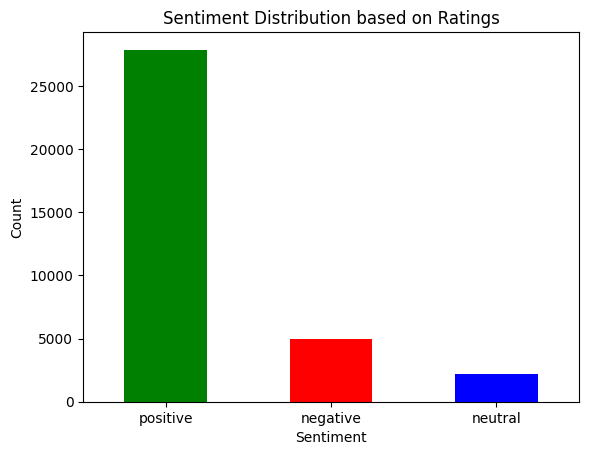

In [29]:
# Plot the sentiment distribution based on ratings
plot_sentiment_distribution(data)